In [1]:
import pandas as pd
import numpy as np


In [2]:
feature_importances = {
    'decision_tree': pd.read_csv('results/feature_importances_decision_tree.csv', index_col=0),
    'random_forest': pd.read_csv('results/feature_importances_random_forest.csv', index_col=0),
    'gradient_boosting': pd.read_csv('results/feature_importances_gradient_boosting.csv', index_col=0),
    'logistic_regression': pd.read_csv('results/feature_importances_logistic_regression.csv', index_col=0),
    'svm': pd.read_csv('results/feature_importances_svm.csv', index_col=0),
    'neural_network': pd.read_csv('results/feature_importances_neural_network.csv', index_col=0),
}

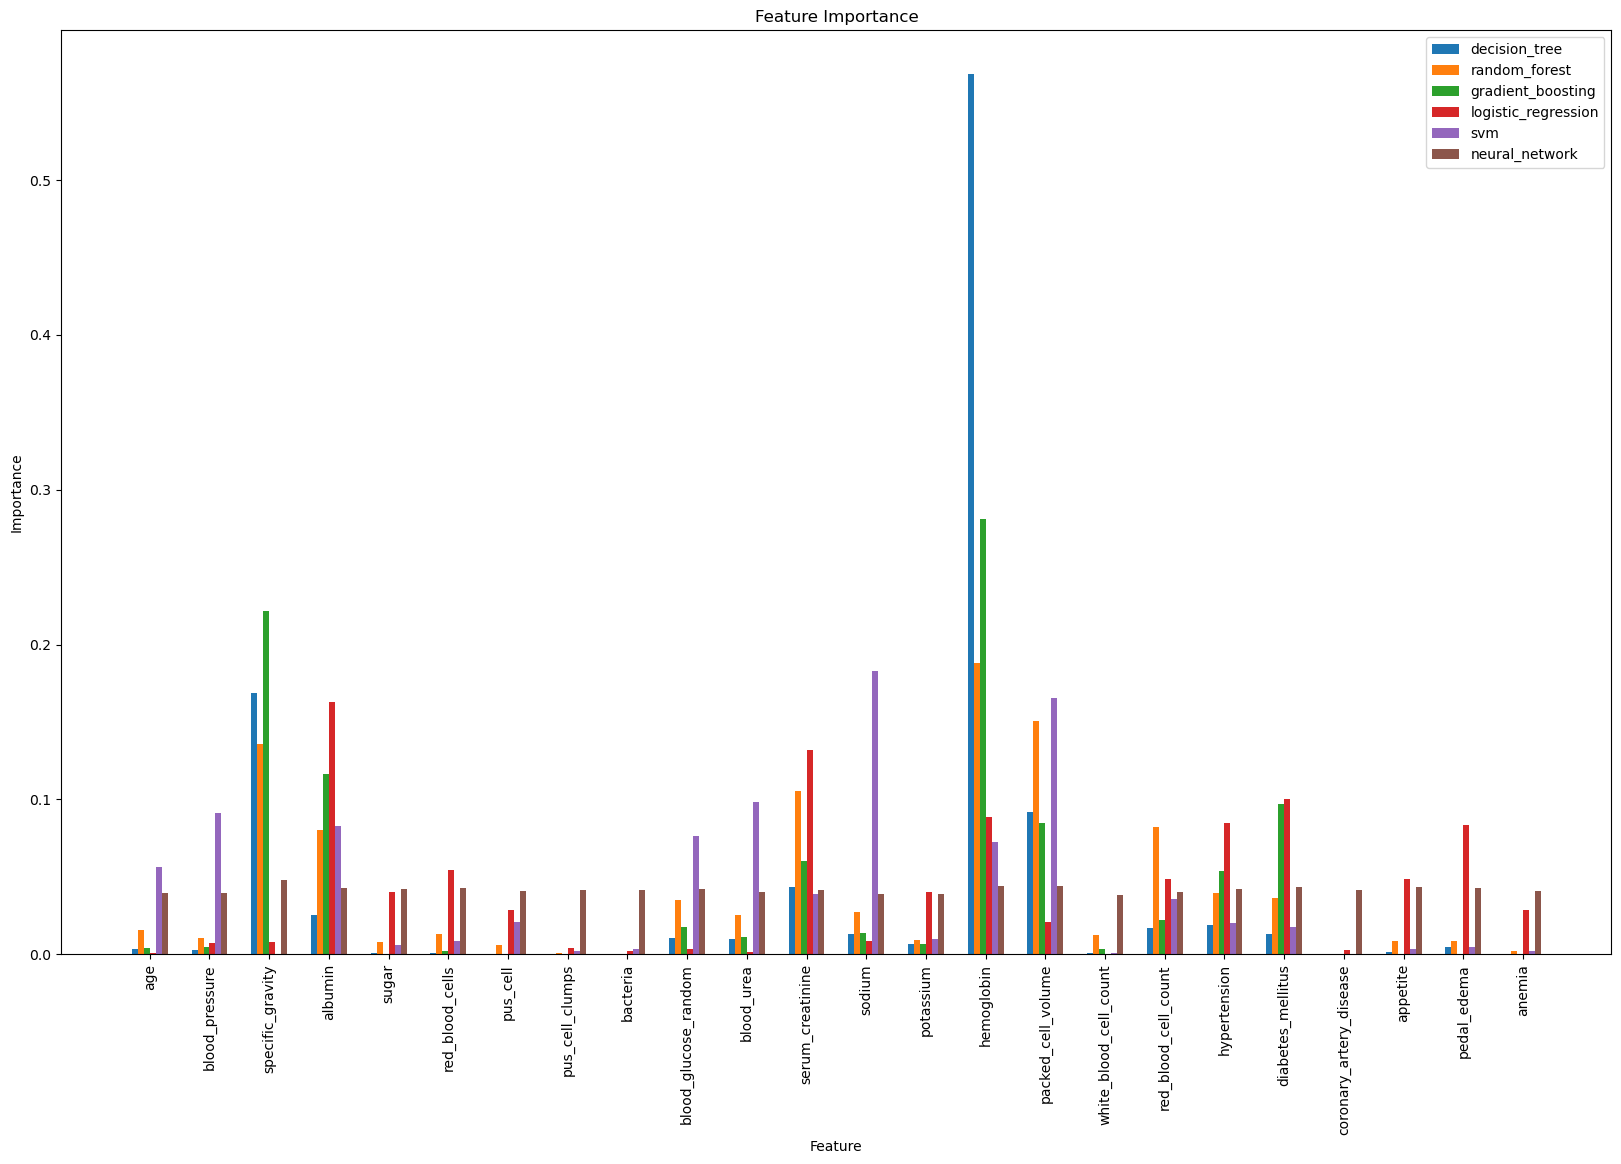

In [3]:
from util.functions import plot_feature_importances
plot_feature_importances(feature_importances)